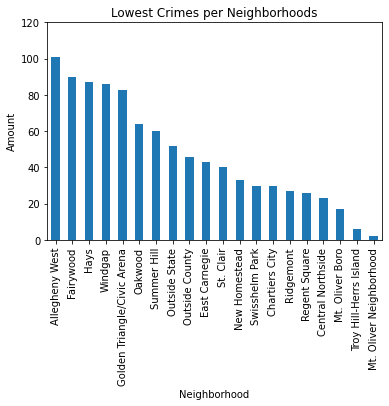

In [2]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

# Import data
police_arrests = pd.read_csv("police-arrest.csv")

# Get data related to arrests within certain neighborhoods
rates = police_arrests['INCIDENTNEIGHBORHOOD'].value_counts()
rates.tail(20).plot(kind="bar", ylim=[0,120])
plt.title("Lowest Crimes per Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Amount")

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

# arrest_rates = police_arrests.groupby('INCIDENTNEIGHBORHOOD').size()
# arrests_maps = neighborhoods.merge(arrest_rates, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
# ASK HOW TO MAKE THIS WORK (COLORED MAP OF PITTSBURGH BY HOW FREQUENT CRIMES ARE PER NEIGHBORHOOD)